### Google Colab: Mount Drive and change to project notebook

In [1]:
import os
os.chdir('/content/drive/MyDrive/projects/Tensorflow-tutorial-Daniel-Bourke/notebooks')

In [2]:
!ls ../

data	notebooks  references  requirements.txt  setup.py  src.egg-info
models	README.md  reports     scripts		 src	   venv


### Google Colab: Install the package

In [3]:
!pip install -e ../.

Obtaining file:///content/drive/MyDrive/projects/Tensorflow-tutorial-Daniel-Bourke
  Running setup.py develop for src


# Tensorflow Fundamentals

Contents:

* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & Numpy
* Using @tf.function -> a way to speed up Python functions
* Using GPUs with tensorflow
* Exercises

## Introduction to tensors

In [4]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [5]:
# Define a constant tensor -> 0D Tensor
scalar = tf.constant(2)
scalar


<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [6]:
# Check the dimensions
scalar.ndim

0

In [7]:
# Check the shape
scalar.shape

TensorShape([])

In [8]:
# Let's create a vector! -> 1D tensor
row_vector = tf.constant([10, 10])
row_vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [9]:
row_vector.ndim

1

In [10]:
row_vector.shape

TensorShape([2])

Transposing a 1D tensor has no effect!

In [11]:
tf.transpose(row_vector)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [12]:
# Let's create a column vector -> 2D tensor now!
column_vector = tf.constant([[10], [10]])
column_vector

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[10],
       [10]], dtype=int32)>

In [13]:
# Another way to make a column vector
column_vector = tf.transpose(tf.constant([[10, 10]]))  # Notice double square brackets
column_vector

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[10],
       [10]], dtype=int32)>

In [14]:
column_vector.ndim

2

In [15]:
column_vector.shape

TensorShape([2, 1])

In [16]:
# You can squeeze out the "redundant" dimensions
tf.squeeze(column_vector)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [17]:
# Or you can add an extra dimension by tf.newaxis
row_vector[:, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[10],
       [10]], dtype=int32)>

In [18]:
# or doing this
tf.expand_dims(row_vector, axis=-1)

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[10],
       [10]], dtype=int32)>

In [19]:
# Or doing this
tf.reshape(row_vector, shape=(*row_vector.shape, 1))

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[10],
       [10]], dtype=int32)>

In [20]:
# Let's create a matrix -> 2D Tensor
matrix = tf.constant([[1, 2],
                      [3, 4],
                      [5, 6]])
matrix

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [21]:
# Check the dimensions
matrix.ndim

2

In [22]:
# Check the shape
matrix.shape

TensorShape([3, 2])

In [23]:
# Another matrix
another_matrix = tf.constant([[1, 2, 3],
                              [4, 5, 6]], dtype=tf.float16) # Specify the dtype
another_matrix                              

<tf.Tensor: shape=(2, 3), dtype=float16, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float16)>

In [24]:
# Now let's create a "real" tensor aka more than 2 dimensions!
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]]], 
                     dtype=tf.int32)

tensor

<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]], dtype=int32)>

In [25]:
# Check the number of dims
tensor.ndim

3

In [26]:
# Check the shape
tensor.shape

TensorShape([1, 3, 3])

What we have created so far:

* Scalar -> 0D Tensor
* Vector (Row) - > 1D Tensor 
* Vector (Column) -> 2D Tensor 
* Matrix -> 2D Tensor
* Tensor -> A generalisation in n-dimensions -> nD Tensor


Use case of Tensor?

Series of images in a training set, trained in batch (BATCH_SIZE, WIDTH, HEIGHT, CHANNELS) = (32, 224, 224, 3)

- Batch size taken as 32 (Faster Gradient Descent, Batches fit in memory, data augmentaion in batches, inference/prediction in batches)
- 224 - Height of the image 
- 224 - Width of the image
- 3 - RGB Channels

Suppose we have 6400 RGB images of arbitrary size (Varying size)
* Reshape all images to be of a constant size (224, 224)
* Now the dataset Tensor would have the dimension: (6400, 224, 224, 3)
* Divide into batches based on batch_size = 32 (power of 2 to better fit in the memory, not sure why? hmmm..)
* New dimensions -> (32, 224, 224, 3)
 



## Creating tensors with `tf.Variable`

In [27]:
changeable_tensor = tf.Variable([1, 2])
unchangeable_tensor = tf.constant([1, 2])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>)

In [28]:
# Let's try changing one of the element's value in changeable tensor
changeable_tensor[0] = 3

TypeError: ignored

In [29]:
# To change the value we need to use .assign()
changeable_tensor[0].assign(3)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([3, 2], dtype=int32)>

In [30]:
# How about we try changing the value in unchangeable tensor
unchangeable_tensor[0] = 3

TypeError: ignored

In [31]:
# How about we change values in unchangeable tensor?
unchangeable_tensor[0].assign(3)

AttributeError: ignored

Because this is constant tensor!

# Create random tensors


In [32]:
# Create two random (but the same) tensors!
randgen1 = tf.random.Generator.from_seed(42)
randval1 = randgen1.normal(shape=(3, 2))
randgen2 = tf.random.Generator.from_seed(42)
randval2 = randgen2.normal(shape=(3, 2))

# Let's check if both are equal
randval1 == randval2 

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>

In [33]:
# Create two random (not the same) tensors!
randgen1 = tf.random.Generator.from_seed(42)
randval1 = randgen1.normal(shape=(3, 2))
randgen2 = tf.random.Generator.from_seed(32)
randval2 = randgen2.normal(shape=(3, 2))

# Let's check their equality
randval1 == randval2

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[False, False],
       [False, False],
       [False, False]])>

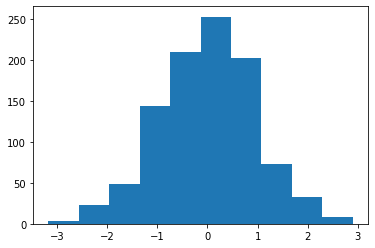

In [34]:
# Normal distribution of the randomly sampled tensor
import matplotlib.pyplot as plt
norm_tensor = tf.random.normal(shape=(1000,))
plt.hist(norm_tensor);

# Shuffle the orders of elements in a tensor
* If we have first 10000 examples as `Ramen` and next 5000 examples as `Spaghetti`
* Shuffling would be useful here to assure good mix of each in each mini batch
* Remember, each batch takes a single step of gradient step assuming the batch represents the parent probability distribution
* Each batch must have the same mix of classes/probability distribution
    * Same probability distribution can also be linked to clusters present in the images

In [35]:
# Create a tensor
not_shuffled = tf.constant([[1, 2],
                            [3, 4],
                            [5, 6]])
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [36]:
# Shuffle our non shuffled tensor (keep running this cell to see how 'its shuffling)
tf.random.set_seed(42)  # If you remove this seed, every shuffle will be new
tf.random.shuffle(not_shuffled, seed=12)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[5, 6],
       [3, 4],
       [1, 2]], dtype=int32)>

**Note**: Shuffling is being done accross the first dimension i.e. rows are being interchanged

Read about [set_seed](https://www.tensorflow.org/api_docs/python/tf/random/set_seed):
* Global seed
* Operation level seed

In [37]:
# Only operation level seed is set
# Even with seed set, you would get different result each time
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [38]:
# Only global level seed is set (Same result every time)
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [1, 2]], dtype=int32)>

In [39]:
# Both (Same result everytime)
tf.random.set_seed(42) 
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

## Other ways of making a tensor


In [40]:
# Create a tensor of ones
tf.ones(shape=(10, 7))


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [41]:
# Create a tensor of all zeros
tf.zeros(shape=(10, 7))

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

## Turn numpy arrays into tensors

Tensors can be operated must faster on by GPUs

In [42]:
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32)
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [43]:
A = tf.constant(numpy_A, shape=(2, 3, 4))
B = tf.constant(numpy_A)

dict(zip(['A', 'B'], [A, B]))

{'A': <tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 'B': <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>}

In [44]:
dict(zip(['A', 'B'], [A.ndim, B.ndim]))

{'A': 3, 'B': 1}

## Getting Information from the tensors

In [45]:
def describe_tensor(tensor):
    print('Datatype:', tensor.dtype)
    print('Number of dimensions:', tensor.ndim)
    print('Shape of tensor:', tensor.shape)
    print('Elements along the 0 axis:',tensor.shape[0])
    print('Elements along the last axis:', tensor.shape[-1])
    print('Total number of elements:', tf.size(tensor).numpy())
    

In [46]:
describe_tensor(tensor)

Datatype: <dtype: 'int32'>
Number of dimensions: 3
Shape of tensor: (1, 3, 3)
Elements along the 0 axis: 1
Elements along the last axis: 3
Total number of elements: 9


## Indexing tensors
Tensors can be indexed just like Python lists

In [49]:
# Set the seed
tf.random.set_seed(42)
tensor4 = tf.random.normal(shape=(32, 8, 8, 3), seed=42) # A single batch of 8x8 RGB Image (32)
tensor4[0, :, :, 1] # (1st batch 1st image and Green channel)

<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
array([[-0.15421568, -0.10875293, -0.6211289 , -1.0798668 , -0.16909476,
         0.8410001 , -1.6971248 , -1.7839274 ],
       [ 1.1488945 ,  0.95193976,  0.10488074,  0.21458012,  0.55202   ,
         0.34291962, -0.8316435 , -0.9340011 ],
       [ 1.2897398 , -0.13424467,  1.8755275 , -0.21415219, -0.36870828,
         0.67288345,  1.3695234 , -2.167099  ],
       [-1.1596807 ,  0.38832134, -0.46657825,  0.2331937 , -1.4149377 ,
        -0.5536773 ,  1.2187223 , -1.1173725 ],
       [-0.7941299 ,  0.8506392 ,  0.9731572 ,  0.9786592 , -0.40033567,
        -1.2027842 ,  0.9958395 , -2.1588895 ],
       [-1.3097545 , -1.7249739 , -0.88928556, -0.83354086,  0.11488263,
         0.09552945, -0.30543768,  0.60830075],
       [-0.20530795,  1.4380885 ,  0.64798355,  0.26897132, -0.7120822 ,
        -0.92031354, -1.5436949 , -0.20956384],
       [ 0.11213502,  0.13058572,  0.4675633 ,  0.81544125,  0.69696605,
         0.4109041 ,  0.5073107 

In [54]:
tensor3 = tf.random.normal(shape=(10, 10, 3)) # A single data point with 10x10 and 3 RGB channels
tensor3

<tf.Tensor: shape=(10, 10, 3), dtype=float32, numpy=
array([[[ 9.24649369e-03, -6.62062764e-01, -7.41026878e-01],
        [ 1.19852614e+00,  8.63620818e-01,  3.92575622e-01],
        [ 9.34574962e-01, -1.60174653e-01, -2.10505342e+00],
        [ 1.37697184e+00,  4.36832577e-01,  7.60811046e-02],
        [-3.78042489e-01, -1.55504063e-01, -9.03932333e-01],
        [ 9.40535128e-01,  1.82766691e-01, -8.34279537e-01],
        [ 9.87892151e-01, -5.44636428e-01,  1.72389877e+00],
        [ 1.07083571e+00,  4.07543689e-01, -1.08923566e+00],
        [-8.71827662e-01,  1.15231538e+00, -1.66073132e+00],
        [ 1.38927922e-01,  2.79677421e-01,  4.74257320e-01]],

       [[ 1.73066831e+00, -4.26890761e-01, -8.97730350e-01],
        [-2.26443291e-01,  5.27190149e-01,  4.16538455e-02],
        [-8.70788097e-01, -2.14466244e-01, -1.72868896e+00],
        [ 2.21466854e-01, -3.52802038e-01,  1.21246660e+00],
        [-5.40104471e-02,  8.13974917e-01,  7.42906272e-01],
        [ 1.79653287e+00, -5.8

In [56]:
# Add an extra dimension in beginning 
# Often done to reshape data point as model expects a tensor of this shape (None, 10, 10, 3)
tensor4 = tensor3[tf.newaxis, ...]
tensor4.shape

TensorShape([1, 10, 10, 3])

In [60]:
# The above thing works with numpy as well
shape = (10, 10, 3)
arr3 = np.random.normal(size=shape)
arr4 = arr3[np.newaxis, ...]
arr4.shape

(1, 10, 10, 3)

## Manipulating Tensors (tensor operations)
**Basic operations**
* Operator overloading i.e +-/*@

In [61]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([1, 2, 3, 4], shape=(2, 2))
tensor += 10
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11, 12],
       [13, 14]], dtype=int32)>

In [62]:
tensor = tf.constant([1, 2, 3, 4], shape=(2, 2))
tensor *= 10

In [63]:
# In addition to operator overloading, we can use builtin functions
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100, 200],
       [300, 400]], dtype=int32)>

### Matrix Multiplication

Most common operation in whole of machine learning and deep learning

Think about matrix multiplication in the following ways \
Justifying following points:
- matching inner dimensions
- Output has the shape of outer dimensions

Contexts:

- In context of linear transformation (and relate this to below contexts)
- In context of linear regression
- In context of neural network layers and neurons and their associated dataset
- In context of batch training of RGB images, sentences, word embeddings etc
- As a way of contraction of certain dimensions. Psst - tensor dot product is also known as tensor contraction


Explanations:

- matrix `A` times column vector `V`
    - Linear combination of column vectors of matrix `A` using `weights` of column vector `V`
    - Matrix `A` is a datasets with each data point stacked as rows, and their corresponding features in each column. Then, the column vector provides how important, or rather the weight of each feature. (so dot product of each row with the column vector)
- matrix `A` times matrix `B`
    - aa
- aa


Two scenarios (for quick thinking remember outer dimensions are preserved):

- $WX$ - Data points as columns, neurons as rows
- $XW$ - Data points as rows, neurons as columns

In [64]:
print(tensor)

tf.Tensor(
[[10 20]
 [30 40]], shape=(2, 2), dtype=int32)


In [65]:
# Matrix multiplication in tensorflow
tf.matmul(tensor, tensor)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 700, 1000],
       [1500, 2200]], dtype=int32)>

In [66]:
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 700, 1000],
       [1500, 2200]], dtype=int32)>

In [70]:
# Create a tensor (3, 2) tensor.
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [71]:
tf.matmul(X, Y)

InvalidArgumentError: ignored

In [72]:
# Let's change the shape of Y
tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [73]:
# Different from tf.transpose
tf.transpose(Y)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  9, 11],
       [ 8, 10, 12]], dtype=int32)>

In [75]:
# now try to multiply X by Y
X @ tf.reshape(Y, shape=(2, 3))


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

### Dot product

* Matrix multiplication can also be expressed as a dot product
* You can perform the matrix multiplication using:
    * tensor.matmul()
    * tensor.tensordot()
    


In [77]:

tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

Generally when performing matrix multiplication between two tensors, and one of the dimensions do not line up, you would **transpose** one of the tensors and **NOT** reshape.

In [79]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [80]:
C = tf.constant([7, 10])
C.dtype

tf.int32

In [81]:
# Change from float32 to float16 (reduced precision but high performance gains + less memory requirements)
D = tf.cast(B, dtype=tf.float16)
D

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [82]:
E = tf.cast(C, dtype=tf.float32)
E

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>

## Aggregating tensors

Use cases:
- Implementing softmax (raise to e -> aggregated sum -> divide by sum)
- Standardizing tensors
- Removing noise (subtract mean noise from images)
- Batch normalization
- Mean prediction
- Argmax prediction
- Evaluating predictions
- All neural network operations 
    - weighted linear combination
    - then summing (aggregation)
    - then non linearity (activation)

In [83]:
# Creating a tensor
tensor = tf.constant([-1, 2])
tensor

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([-1,  2], dtype=int32)>

In [84]:
# Get the absolute values
tf.abs(tensor)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

In [87]:
import tensorflow_probability as tfp

In [90]:
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([68, 79, 12, 94, 23, 22, 38, 31, 37, 96, 10,  7,  6, 33, 26, 15, 98,
       27,  1, 97, 36, 16, 58, 33, 13, 88, 38, 58, 33, 89, 49,  6, 90, 24,
       89, 99, 91, 55, 96, 72, 61, 11, 40, 30, 68, 31, 91, 61, 95, 63])>

In [85]:
def tensor_variance(tensor):
    mu = tf.reduce_mean(tensor)
    var = tf.reduce_sum((tensor - mu)**2)/tf.shape(tensor).numpy()
    return tf.squeeze(var)
    

In [91]:
print('min:', tf.reduce_min(E))
print('max:', tf.reduce_max(E))
print('mean:', tf.reduce_mean(E))
print('sum:', tf.reduce_sum(E))
print('std:', tf.math.reduce_std(tf.cast(E, dtype=tf.float32)))
print('variance:', tf.math.reduce_variance(tf.cast(E, dtype=tf.float32)))
print('variance:', tensor_variance(E))
print('variance:', tfp.stats.variance(E))

min: tf.Tensor(1, shape=(), dtype=int64)
max: tf.Tensor(99, shape=(), dtype=int64)
mean: tf.Tensor(50, shape=(), dtype=int64)
sum: tf.Tensor(2504, shape=(), dtype=int64)
std: tf.Tensor(31.485132, shape=(), dtype=float32)
variance: tf.Tensor(991.3136, shape=(), dtype=float32)
variance: tf.Tensor(991.32, shape=(), dtype=float64)
variance: tf.Tensor(991, shape=(), dtype=int64)


In [95]:
# NOTE: requires real or complex 
# Since our E tensor is int32, we would have to cast it as above
try:
    tf.math.reduce_std(E) 
except Exception as e:
    print(e)

Input must be either real or complex


**Find the positional maximum and minumum**

In [96]:
# Create a new tensor 
tf.random.set_seed(42)
tensor = tf.random.uniform(shape=(50,))
tensor

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [97]:
# Find the positional maximum
tf.argmax(tensor)


<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [98]:
# Index on our largest value position
tensor[tf.argmax(tensor)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [100]:
tf.reduce_max(tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

### Squeeze a tensor (remove all single dimensions)



In [104]:
tf.random.set_seed(42)
tensor = tf.constant(tf.random.uniform(shape=(10, 2)), shape=(1, 1, 1, 1, 10, 1, 2))
tensor

<tf.Tensor: shape=(1, 1, 1, 1, 10, 1, 2), dtype=float32, numpy=
array([[[[[[[0.6645621 , 0.44100678]],

           [[0.3528825 , 0.46448255]],

           [[0.03366041, 0.68467236]],

           [[0.74011743, 0.8724445 ]],

           [[0.22632635, 0.22319686]],

           [[0.3103881 , 0.7223358 ]],

           [[0.13318717, 0.5480639 ]],

           [[0.5746088 , 0.8996835 ]],

           [[0.00946367, 0.5212307 ]],

           [[0.6345445 , 0.1993283 ]]]]]]], dtype=float32)>

In [105]:
tf.squeeze(tensor)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0.6645621 , 0.44100678],
       [0.3528825 , 0.46448255],
       [0.03366041, 0.68467236],
       [0.74011743, 0.8724445 ],
       [0.22632635, 0.22319686],
       [0.3103881 , 0.7223358 ],
       [0.13318717, 0.5480639 ],
       [0.5746088 , 0.8996835 ],
       [0.00946367, 0.5212307 ],
       [0.6345445 , 0.1993283 ]], dtype=float32)>

### One Hot Encoding

In [106]:
# Create a list of labels
some_list = [0, 1, 2, 3]
num_cat = 4
tf.one_hot(some_list, depth=num_cat)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [111]:
# Sample from a multinomial distribution
# Imagine this being the labels Y for a supervised problem
num_cats = 5
probs = [0.1, 0.2, 0.1, 0.45, 0.15]
samples = tf.squeeze(tf.random.categorical(tf.math.log([probs]), 20))
samples

<tf.Tensor: shape=(20,), dtype=int64, numpy=array([3, 4, 1, 1, 2, 1, 2, 3, 3, 1, 0, 0, 3, 4, 4, 3, 1, 4, 2, 3])>

In [112]:
tf.one_hot(samples, depth=num_cats)


<tf.Tensor: shape=(20, 5), dtype=float32, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)>

In [114]:
tf.one_hot(samples, depth=num_cats, on_value='yes', off_value='no')

<tf.Tensor: shape=(20, 5), dtype=string, numpy=
array([[b'no', b'no', b'no', b'yes', b'no'],
       [b'no', b'no', b'no', b'no', b'yes'],
       [b'no', b'yes', b'no', b'no', b'no'],
       [b'no', b'yes', b'no', b'no', b'no'],
       [b'no', b'no', b'yes', b'no', b'no'],
       [b'no', b'yes', b'no', b'no', b'no'],
       [b'no', b'no', b'yes', b'no', b'no'],
       [b'no', b'no', b'no', b'yes', b'no'],
       [b'no', b'no', b'no', b'yes', b'no'],
       [b'no', b'yes', b'no', b'no', b'no'],
       [b'yes', b'no', b'no', b'no', b'no'],
       [b'yes', b'no', b'no', b'no', b'no'],
       [b'no', b'no', b'no', b'yes', b'no'],
       [b'no', b'no', b'no', b'no', b'yes'],
       [b'no', b'no', b'no', b'no', b'yes'],
       [b'no', b'no', b'no', b'yes', b'no'],
       [b'no', b'yes', b'no', b'no', b'no'],
       [b'no', b'no', b'no', b'no', b'yes'],
       [b'no', b'no', b'yes', b'no', b'no'],
       [b'no', b'no', b'no', b'yes', b'no']], dtype=object)>

### Square, log, square root

In [115]:
tensor = tf.range(1, 10)
tensor

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [116]:
tf.square(tensor)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [118]:
# Square root will require a real (float) or complex -> on int it won't work
tf.sqrt(tensor)

InvalidArgumentError: ignored

In [119]:
tf.sqrt(tf.cast(tensor, dtype=tf.float16))

<tf.Tensor: shape=(9,), dtype=float16, numpy=
array([1.   , 1.414, 1.732, 2.   , 2.236, 2.45 , 2.646, 2.828, 3.   ],
      dtype=float16)>

In [120]:
tf.math.log(tf.cast(tensor, dtype=tf.float16))

<tf.Tensor: shape=(9,), dtype=float16, numpy=
array([0.    , 0.6934, 1.099 , 1.387 , 1.609 , 1.792 , 1.946 , 2.08  ,
       2.197 ], dtype=float16)>

### Tensors and numpy
Tensorflow interacts beautifully with Numpy arrays (full interoperability)

In [121]:
tensor.numpy()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [124]:
# The default types of each are slightly different
tensor_np = tf.constant(np.array([3., 7., 10.]))
tensor_tf = tf.constant([3., 7., 10.])

print('tensorflow datatype: ', tensor_tf.dtype)
print('numpy datatype: ', tensor_np.dtype)

tensorflow datatype:  <dtype: 'float32'>
numpy datatype:  <dtype: 'float64'>
